This code is for EN5423 class at GIST, Republic of Korea, and created by Dr. Hyunglok Kim.  
**Contact information**: hyunglokkim@gist.ac.kr  
**License**: This work is licensed for non-commercial use only.  
**Restrictions**: Do not use this material without permission for teaching or developing other classes.

In [44]:
import os

import numpy as np
import pandas as pd
import netCDF4 as nc

import matplotlib.pyplot as plt

!pip install --upgrade scipy
import scipy.stats as stats
from scipy.stats import binom
from scipy.stats import bootstrap


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


### Example 1: Importance of the Student’s t-Distribution 

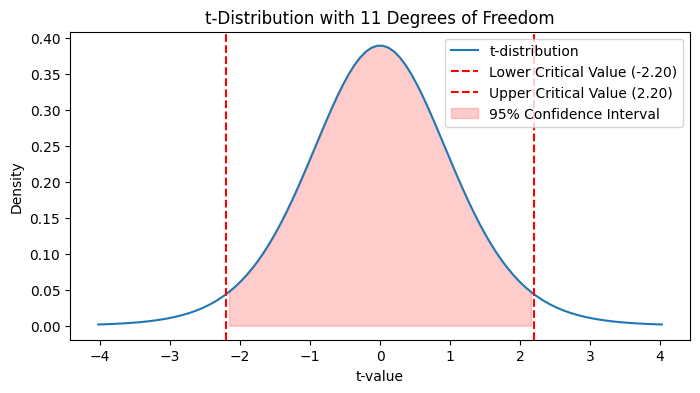

In [34]:
# Parameters
n = 12
df = n - 1
confidence_level = 0.95
alpha = 1 - confidence_level

# Critical values
t_critical_lower = stats.t.ppf(alpha / 2, df)
t_critical_upper = stats.t.ppf(1 - alpha / 2, df)

# t-distribution range for plotting
t_values = np.linspace(stats.t.ppf(0.001, df), stats.t.ppf(0.999, df), 100)
t_pdf = stats.t.pdf(t_values, df)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(t_values, t_pdf, label='t-distribution')

# Critical points
plt.axvline(x=t_critical_lower, color='r', linestyle='--', label=f'Lower Critical Value ({t_critical_lower:.2f})')
plt.axvline(x=t_critical_upper, color='r', linestyle='--', label=f'Upper Critical Value ({t_critical_upper:.2f})')

# Fill area between critical values
plt.fill_between(t_values, t_pdf, where=(t_values >= t_critical_lower) & (t_values <= t_critical_upper), color='red', alpha=0.2, label='95% Confidence Interval')

plt.xlabel('t-value')
plt.ylabel('Density')
plt.title('t-Distribution with 11 Degrees of Freedom')
plt.legend()
plt.show()

In [3]:
import numpy as np
import scipy.stats as stats

# Step 1: Generate 12 random samples from a normal distribution
np.random.seed(0)  # For reproducibility
samples = np.random.normal(loc=5, scale=1, size=12)

# Step 2 & 3: Calculate the sample mean and sample standard deviation
sample_mean = np.mean(samples)
sample_std = np.std(samples, ddof=1)  # ddof=1 to use sample standard deviation

# Step 4: Determine the critical t-value
confidence_level = 0.95
df = len(samples) - 1
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1 - alpha/2, df)

# Step 5 & 6: Calculate the standard error of the mean and margin of error
SEM = sample_std / np.sqrt(len(samples))
margin_of_error = t_critical * SEM

# Step 7: Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Sample mean: {sample_mean}")
print(f"95% confidence interval for the mean: {confidence_interval}")

Sample mean: 5.74821239878435
95% confidence interval for the mean: (5.135873430754804, 6.360551366813896)


### Example 2: Binomial Distribution Method 

In [4]:
arsenic_concentrations = np.array([1.3, 1.5, 1.8, 2.6, 2.8, 3.5, 4.0, 4.8, 8.0, 9.5, 12, 14, 19, 23, 41, 80, 100, 110, 120, 190, 240, 250, 300, 340, 580])
arsenic_concentrations = np.sort(arsenic_concentrations)
# Calculate critical ranks using the binomial distribution
n = len(arsenic_concentrations)
alpha = 0.05  # Significance level

lower_rank, upper_rank = binom.ppf([alpha / 2, 1 - alpha / 2], n, 0.5).astype(int)
print([lower_rank, upper_rank])

[8, 17]


In [5]:
arsenic_concentrations[[lower_rank-1,upper_rank-1]]

array([  4.8, 100. ])

In [11]:
# Parameters for the binomial distribution
n = 25  # number of samples
p = 0.5  # probability of success

# Calculate the PMF for each value from 8 to 18 and sum them
probability_sum = np.sum(binom.pmf(np.arange(8, 18), n, p))

print("Sum of probabilities from 8 to 17:", probability_sum)

Sum of probabilities from 8 to 17: 0.9567147493362429


### Homework04 #1: Understanding Median Confidence Intervals Using Binomial Distribution

**Objective:** Utilize the concept of binomial distribution to compute confidence intervals for median streamflow data.

**Dataset Description:** You are provided with a dataset consisting of the samples of temperature measurements (in degree Celsius) from a hypothetical basin. These measurements hourly average temperature observed over a month period.

**Tasks:**

1. **Data Exploration and Median Calculation**:
   - Import the streamflow dataset (use the usgs-streamflow-nldas_hourly.nc data provided previously).
   - Calculate and report the sample median of the streamflow data.

2. **Confidence Interval Estimation**:
   - Using a significance level (α) of 0.05, calculate the 95% confidence interval for the median streamflow. This involves using the binomial distribution to find the critical ranks within the dataset corresponding to α/2 and 1-α/2.
   - Implement Python code utilizing the `scipy.stats` package to determine these critical values and then identify the streamflow measurements corresponding to these ranks.

3. **Interpretation and Probability Summation**:
   - Summarize the probability density values from the critical lower rank to the upper rank to verify the confidence level of the interval you computed.
   - Discuss the interpretation of this confidence interval in the context of temperature data. How does the interval reflect the variability and the central tendency of your dataset?

4. **Plotting**:
   - Create a plot that visualizes the 95% confidence interval for the median within your dataset (histgram). Mark the median and the bounds of the confidence interval on this plot.

In [18]:
FP = '/work/'
input_file = 'usgs-streamflow-nldas_hourly.nc'

# Open the NetCDF file
dataset = nc.Dataset(os.path.join(FP, input_file), mode='r')

# Extract temperature and date
T = np.sort(np.array(dataset.variables['temperature'][0, :]))
times = nc.num2date(dataset.variables['date'][:], units="hours since 2000-01-01 00:00:00", calendar="proleptic_gregorian")

time_strings = [str(time) for time in times]  # Convert cftime objects to strings
time_datetimes = pd.to_datetime(time_strings)  # Convert strings to pandas datetime objects

# Convert to pandas DataFrame
df = pd.DataFrame({'Temperature': T}, index=time_datetimes)
start_date = '2000-09-01'
end_date = '2000-09-30'
df = df.loc[start_date:end_date]

# Sort the data to ensure the ranks correspond to the correct values
T = df.Temperature

In [19]:
# Sample size
n = len(T)

# Significance level
alpha = 0.05

# Calculate the critical ranks for the lower and upper bounds of the confidence interval
lower_rank, upper_rank = binom.ppf([alpha / 2, 1 - alpha / 2], n, 0.5).astype(int)

# Adjust ranks for zero-based indexing in Python
lower_value = T[lower_rank - 1]
upper_value = T[upper_rank - 1]

# Print the confidence interval
print(f"95% confidence interval for the median is between {lower_value} and {upper_value} Degree Cel.")

# To calculate the sum of probabilities from 8 to 17 to verify the confidence level
probability_sum = np.sum(binom.pmf(range(lower_rank, upper_rank + 1), n, 0.5))
print(f"Sum of probabilities from rank {lower_rank} to {upper_rank}: {probability_sum:.4f}")


95% confidence interval for the median is between 5.971481800079346 and 6.040040493011475 Degree Cel.
Sum of probabilities from rank 334 to 386: 0.9518
/tmp/ipykernel_69/959107091.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lower_value = T[lower_rank - 1]
/tmp/ipykernel_69/959107091.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  upper_value = T[upper_rank - 1]


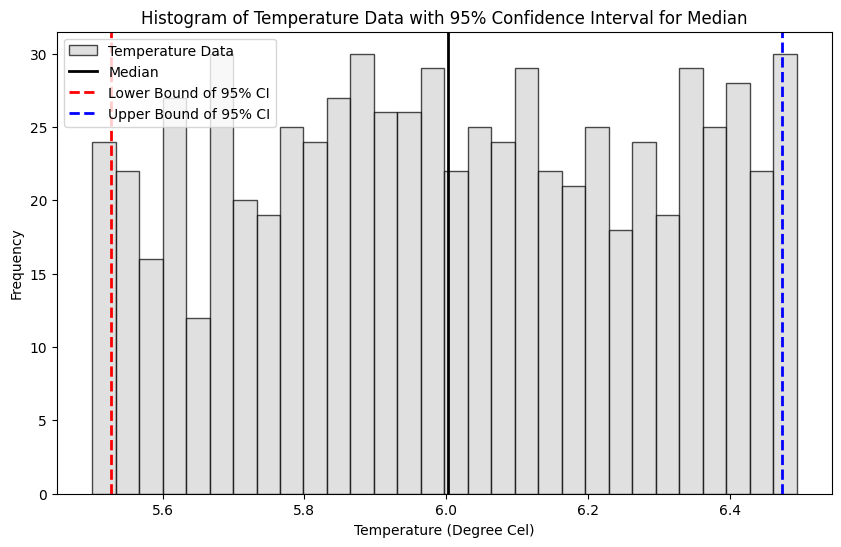

In [18]:
#Expected plot

### Example 3: Bootstrapping method (median)

In [22]:
# Example 3 without using SciPy lib
n_resamples = 10000
alpha = 0.05  # Significance level for a 95% confidence interval
n = len(arsenic_concentrations)

# Store bootstrapped sample medians
bootstrapped_medians = np.zeros(n_resamples)

# Generating bootstrapped samples and computing medians
for i in range(n_resamples):
    # Generate a bootstrapped sample with replacement
    sample = np.random.choice(arsenic_concentrations, size=n, replace=True)
    # Compute and store the median of the bootstrapped sample
    bootstrapped_medians[i] = np.median(sample)

# Computing the (1-alpha) confidence interval for the median
lower_bound = np.percentile(bootstrapped_medians, (alpha/2)*100)
upper_bound = np.percentile(bootstrapped_medians, (1-alpha/2)*100)

print(f"Bootstrap Confidence Interval of the Median of Arsenic Concentrations:")
print(f"95% Confidence Interval: ({lower_bound:.1f}, {upper_bound:.1f})")

Bootstrap Confidence Interval of the Median of Arsenic Concentrations:
95% Confidence Interval: (4.8, 110.0)


In [30]:
import scipy
print(scipy.__version__)

1.9.3


In [59]:
# Example 3 with using SciPy lib
arsenic = np.array([1.3, 1.5, 1.8, 2.6, 2.8, 3.5, 4.0, 4.8, 8.0, 9.5, 12, 14, 19, 23, 41, 80, 100, 110, 120, 190, 240, 250, 300, 340, 580])
arsenic = np.sort(arsenic_concentrations)

# Perform the bootstrap for the median
bootstrap_results = bootstrap((arsenic,), np.median, confidence_level=0.95, n_resamples=2000, method='percentile')

# Extract the confidence interval
ci_lower, ci_upper = bootstrap_results.confidence_interval

print(f"Bootstrap Confidence Intervals of the Median of arsenic:")
print(f"95% Confidence Interval: ({ci_lower:.1f}, {ci_upper:.1f})")

Bootstrap Confidence Intervals of the Median of arsenic:
95% Confidence Interval: (4.8, 110.0)


# Homework04 #2: Estimating Confidence Intervals Using Bootstrapping

## Objective

Apply the bootstrap method to compute confidence intervals for the median temperature from a dataset, thereby understanding the application of statistical resampling techniques in environmental science.

## Dataset Description

The dataset consists of hourly temperature measurements (in degrees Celsius) observed over a month in a hypothetical basin. This dataset serves as a basis to explore statistical variability and estimation methods.

## Tasks

### Data Exploration and Median Calculation:
- Import the `temperature_data` NumPy array, which contains the temperature measurements.
- Calculate and report the sample median of the temperature data.

### Confidence Interval Estimation via Bootstrapping:
- Implement a bootstrap algorithm from scratch to calculate the 95% confidence interval for the median temperature. This involves:
    - Resampling the original dataset with replacement to create a large number (5000) of "bootstrap samples".
    - Calculating the median for each bootstrap sample.
    - Determining the 2.5th and 97.5th percentiles of the bootstrap medians to define the confidence interval.
- Provide Python code for the bootstrap procedure, avoiding the use of high-level statistical functions from libraries like `scipy.stats` for the core bootstrap logic.

### Interpretation and Analysis:
- Interpret the computed 95% confidence interval for the median temperature. Discuss what this interval conveys about the central tendency and the variability of the dataset.
- Reflect on the advantages and limitations of using the bootstrap method for interval estimation in environmental data analysis.

### Visualization:
- Create a histogram of the original temperature dataset to visualize its distribution.
- Overlay the histogram with vertical lines indicating the median and the bounds of the 95% confidence interval obtained through bootstrapping.
- Ensure your plot includes appropriate labels for the x-axis (Temperature in degrees Celsius), y-axis (Frequency), and a legend explaining the median and confidence interval bounds.

In [60]:
FP = '/work/'
input_file = 'usgs-streamflow-nldas_hourly.nc'

# Open the NetCDF file
dataset = nc.Dataset(os.path.join(FP, input_file), mode='r')

# Open the NetCDF file
dataset = nc.Dataset(os.path.join(FP, input_file), mode='r')

# Extract temperature and date
T = np.sort(np.array(dataset.variables['temperature'][0, :]))
times = nc.num2date(dataset.variables['date'][:], units="hours since 2000-01-01 00:00:00", calendar="proleptic_gregorian")

time_strings = [str(time) for time in times]  # Convert cftime objects to strings
time_datetimes = pd.to_datetime(time_strings)  # Convert strings to pandas datetime objects

# Convert to pandas DataFrame
df = pd.DataFrame({'Temperature': T}, index=time_datetimes)
start_date = '2000-09-01'
end_date = '2000-09-30'
df = df.loc[start_date:end_date]

# Sort the data to ensure the ranks correspond to the correct values
T = df.Temperature

### Example 4: Bootstrapping method (mean)

In [61]:
# Example 4 without using SciPy lib
n_resamples = 10000
alpha = 0.05  # Significance level for a 95% confidence interval
n = len(arsenic)

# Store bootstrapped sample medians
bootstrapped_mean = np.zeros(n_resamples)

# Generating bootstrapped samples and computing medians
for i in range(n_resamples):
    # Generate a bootstrapped sample with replacement
    sample = np.random.choice(arsenic, size=n, replace=True)
    # Compute and store the median of the bootstrapped sample
    bootstrapped_mean[i] = np.mean(sample)

# Computing the (1-alpha) confidence interval for the median
lower_bound = np.percentile(bootstrapped_mean, (alpha/2)*100)
upper_bound = np.percentile(bootstrapped_mean, (1-alpha/2)*100)

print(f"Bootstrap Confidence Interval of the Mean of Arsenic Concentrations:")
print(f"95% Confidence Interval: ({lower_bound:.1f}, {upper_bound:.1f})")

Bootstrap Confidence Interval of the Mean of Arsenic Concentrations:
95% Confidence Interval: (47.7, 158.9)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=46b55556-303b-48fb-98fc-fceeb58f931a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>